# starter notebook for assignment 1 in inverse problems

This notebook illustrates how to use the provided pixel_intersection_length function and how to load the data. 


the ray intersected 16 pixels and the total intersection length was 202 units.


(array([ 0,  1,  1,  2,  3,  3,  4,  5,  6,  6,  7,  8,  8,  9, 10, 11]),
 array([5, 5, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9]),
 array([18.,  7., 11., 18., 16.,  2., 18., 18.,  7., 11., 18., 16.,  2.,
        18., 18.,  7.]))

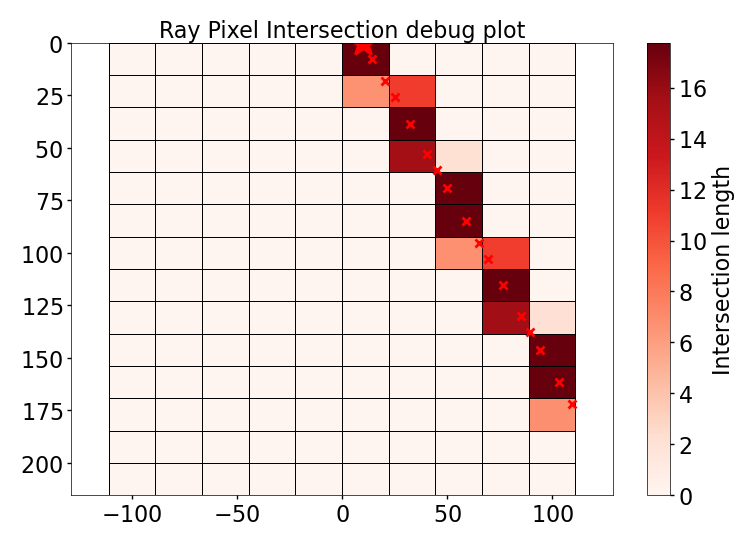

In [2]:
import pandas as pd  # pandas is not strictly necessary
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("https://www.glaciology.net/aslak.mplstyle")  # this has bigger fonts and fatter lines. But you can decide how you want it to look.

from pixelrayintersect import pixel_intersection_length

x = np.linspace(-100, 100, 10)
y = np.linspace(0, 200, 14)
dx = x[1] - x[0]
dy = y[1] - y[0]
y = y + dy / 2  # now x and y are pixel centers.
X, Y = np.meshgrid(x, y)

angle = 30
rayvectorx = np.sin(angle * np.pi / 180)
rayvectory = np.cos(angle * np.pi / 180)

r, c, L = pixel_intersection_length(x, y, 10, 0, rayvectorx, rayvectory, debug=True)

print(f"the ray intersected {len(L)} pixels and the total intersection length was {np.sum(L):.0f} units.")
r, c, np.round(L)

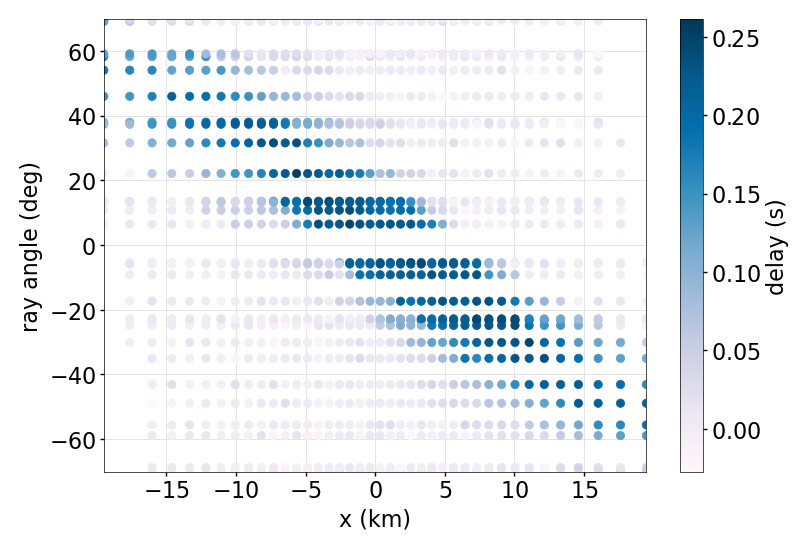

In [ ]:
# load the data into numpy arrays
df = pd.read_csv("observed_data.csv")
d_obs = df.time_delay.values  # units: seconds
angles = df.angle.values  # units: degrees from vertical
receiverx = df.receiverx.values  # units: metres
rayvectorx = np.sin(angles * np.pi / 180)
rayvectory = np.cos(angles * np.pi / 180)

# alternative way of loading. More fragile than pandas if the file format changes
angles, receiverx, d_obs = np.loadtxt("observed_data.csv", delimiter=",", skiprows=1, unpack=True)

plt.scatter(receiverx / 1000, angles, c=d_obs)
plt.xlabel("x (km)")
plt.ylabel("ray angle (deg)")

plt.colorbar(label="delay (s)")